In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Mushroom')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [ ]:
# the dataset has 8124 rows and 23 columns

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# dataset has no null values

In [7]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
# dataset has two outcomes in class column, so logistic regression case

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

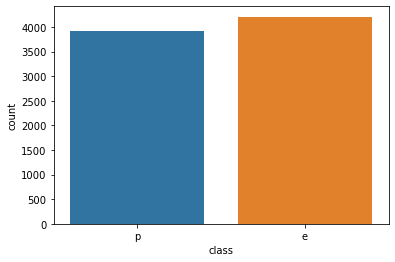

In [9]:
sn.countplot(df['class'])

In [21]:
#labelencoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['class']=LE.fit_transform(df['class'])
df['cap-shape']=LE.fit_transform(df['cap-shape'])
df['cap-surface']=LE.fit_transform(df['cap-surface'])
df['bruises']=LE.fit_transform(df['bruises'])
df['odor']=LE.fit_transform(df['odor'])
df['cap-color']=LE.fit_transform(df['cap-color'])
df['gill-attachment']=LE.fit_transform(df['gill-attachment'])
df['gill-spacing']=LE.fit_transform(df['gill-spacing'])
df['gill-size']=LE.fit_transform(df['gill-size'])
df['gill-color']=LE.fit_transform(df['gill-color'])
df['stalk-shape']=LE.fit_transform(df['stalk-shape'])
df['stalk-root']=LE.fit_transform(df['stalk-root'])
df['stalk-surface-above-ring']=LE.fit_transform(df['stalk-surface-above-ring'])
df['stalk-surface-below-ring']=LE.fit_transform(df['stalk-surface-below-ring'])
df['stalk-color-above-ring']=LE.fit_transform(df['stalk-color-above-ring'])                                     
df['stalk-color-below-ring']=LE.fit_transform(df['stalk-color-below-ring'])
df['veil-type']=LE.fit_transform(df['veil-type'])
df['veil-color']=LE.fit_transform(df['veil-color'])
df['ring-number']=LE.fit_transform(df['ring-number'])
df['ring-type']=LE.fit_transform(df['ring-type']) 
df['spore-print-color']=LE.fit_transform(df['spore-print-color'])
df['population']=LE.fit_transform(df['population']) 
df['habitat']=LE.fit_transform(df['habitat'])                                     

In [ ]:
# with help of using label encoder converted datasets object values to intiger

In [22]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [25]:
cor=df.corr()

In [26]:
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

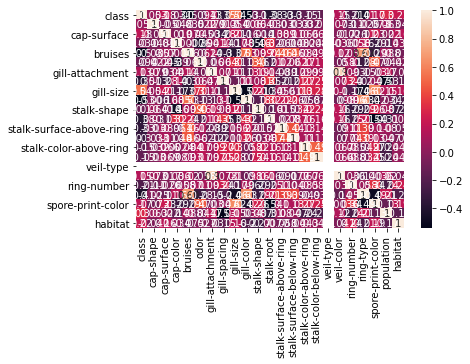

In [27]:
sn.heatmap(cor,annot=True)

In [35]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [36]:
# Model building and training

x=df.drop('class',axis=1)
y=df['class']

In [37]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [38]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [48]:
lm=LogisticRegression()

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [51]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("best accuracy is",maxAccu,"on random_state",maxRs)

best accuracy is 1.0 on random_state 1


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [54]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

1.0


In [ ]:
# applied decision tree classifier, accuracy score is 1.0

In [55]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

1.0


In [ ]:
# applied random forest classifier, accuracy score is 1.0

In [56]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.9864643150123051


In [ ]:
# applied support vector classifier, accuracy score is 0.98

In [57]:
# Cross Validation application

from sklearn.model_selection import cross_val_score


In [58]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9610985979537704


In [ ]:
# Decision tree classifier cross val score is 0.96

In [59]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8933693065555135


In [ ]:
# Random Forest classifier cross val score is 0.89

In [60]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.841292231906025


In [ ]:
# Support vector classifier cross val score is 0.84

In [62]:
#then model accuracy-cross validation score and least difference value is best model
# DTC is the best model
# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

In [63]:
parameter={'max_depth':np.arange(2,10),
          'criterion':['gini','entropy']}

In [64]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [66]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [67]:
final_mod=DecisionTreeClassifier(criterion='gini',max_depth=7)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


In [ ]:
# after applying criterion-gini at max-depth 7,the accuracy is 100%

In [69]:
# saving the model
import joblib
joblib.dump(final_mod,"mushroom.pkl")

['mushroom.pkl']